<a href="https://colab.research.google.com/github/ShanmukhRamachandruni/Data-Science/blob/main/Shanmukh_R4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  %load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
#samlple for simple linear regression
%%R
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)

In [ ]:
%%R
salary=read_csv("/content/Salary_Data.csv")

Rows: 30 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): YearsExperience, Salary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
salary

# A tibble: 30 × 2
   YearsExperience Salary
             <dbl>  <dbl>
 1             1.1  39343
 2             1.3  46205
 3             1.5  37731
 4             2    43525
 5             2.2  39891
 6             2.9  56642
 7             3    60150
 8             3.2  54445
 9             3.2  64445
10             3.7  57189
# … with 20 more rows


In [ ]:
%%R
print(salary$YearsExperience)

print(salary$Salary)

 [1]  1.1  1.3  1.5  2.0  2.2  2.9  3.0  3.2  3.2  3.7  3.9  4.0  4.0  4.1  4.5
[16]  4.9  5.1  5.3  5.9  6.0  6.8  7.1  7.9  8.2  8.7  9.0  9.5  9.6 10.3 10.5
 [1]  39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
[11]  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
[21]  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872


In [ ]:
%%R
cor(salary$Salary, salary$YearsExperience)

[1] 0.9782416


In [ ]:
%%R
relation<-lm(salary$Salary~salary$YearsExperience)
print(relation)


Call:
lm(formula = salary$Salary ~ salary$YearsExperience)

Coefficients:
           (Intercept)  salary$YearsExperience  
                 25792                    9450  



In [ ]:
%%R
summary(relation)


Call:
lm(formula = salary$Salary ~ salary$YearsExperience)

Residuals:
    Min      1Q  Median      3Q     Max 
-7958.0 -4088.5  -459.9  3372.6 11448.0 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             25792.2     2273.1   11.35 5.51e-12 ***
salary$YearsExperience   9450.0      378.8   24.95  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5788 on 28 degrees of freedom
Multiple R-squared:  0.957,	Adjusted R-squared:  0.9554 
F-statistic: 622.5 on 1 and 28 DF,  p-value: < 2.2e-16



In [ ]:
%%R
print(coefficients(relation))

           (Intercept) salary$YearsExperience 
             25792.200               9449.962 


In [ ]:
%%R
names(relation)

 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        


In [ ]:
%%R
#str(relation)
relation$coefficients[1]


(Intercept) 
    25792.2 


In [ ]:
%%R
c=relation$coefficients[1]
m=relation$coefficients[2]
print(c)
print(m)

(Intercept) 
    25792.2 
salary$YearsExperience 
              9449.962 


In [ ]:
%%R
salary_output=m*10+c
print(salary_output)

salary$YearsExperience 
              120291.8 


In [ ]:
%%R
y=m*salary$YearsExperience+c
print(y)
salary1<-mutate(salary,predicted=y)
salary2<-mutate(salary1,difference=Salary-predicted)
print(salary1)
print(salary2)

 [1]  36187.16  38077.15  39967.14  44692.12  46582.12  53197.09  54142.09
 [8]  56032.08  56032.08  60757.06  62647.05  63592.05  63592.05  64537.05
[15]  68317.03  72097.02  73987.01  75877.00  81546.98  82491.97  90051.94
[22]  92886.93 100446.90 103281.89 108006.87 110841.86 115566.84 116511.84
[29] 123126.81 125016.80
# A tibble: 30 × 3
   YearsExperience Salary predicted
             <dbl>  <dbl>     <dbl>
 1             1.1  39343    36187.
 2             1.3  46205    38077.
 3             1.5  37731    39967.
 4             2    43525    44692.
 5             2.2  39891    46582.
 6             2.9  56642    53197.
 7             3    60150    54142.
 8             3.2  54445    56032.
 9             3.2  64445    56032.
10             3.7  57189    60757.
# … with 20 more rows
# A tibble: 30 × 4
   YearsExperience Salary predicted difference
             <dbl>  <dbl>     <dbl>      <dbl>
 1             1.1  39343    36187.      3156.
 2             1.3  46205    38077.      8

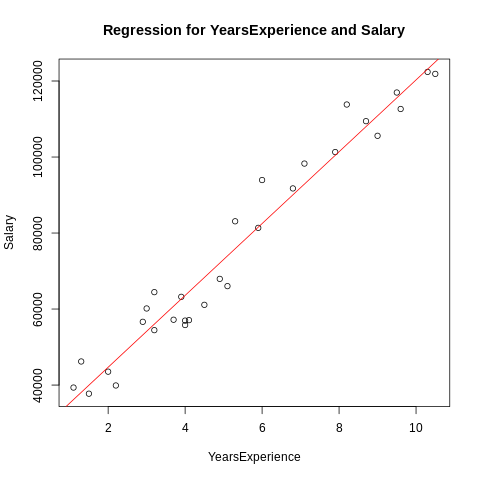

In [ ]:
%%R
plot(salary$YearsExperience,salary$Salary,
     main="Regression for YearsExperience and Salary",
     xlab='YearsExperience',ylab='Salary')
abline(relation,col="red")


In [ ]:
%%R
 ga=read_csv("/content/GAdata.csv")

Rows: 500 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): SerialNo., GREScore, TOEFLScore, UniversityRating, SOP, LOR, CGPA, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
ga

# A tibble: 500 × 9
   SerialNo. GREScore TOEFLScore UniversityRating   SOP   LOR  CGPA Research
       <dbl>    <dbl>      <dbl>            <dbl> <dbl> <dbl> <dbl>    <dbl>
 1         1      337        118                4   4.5   4.5  9.65        1
 2         2      324        107                4   4     4.5  8.87        1
 3         3      316        104                3   3     3.5  8           1
 4         4      322        110                3   3.5   2.5  8.67        1
 5         5      314        103                2   2     3    8.21        0
 6         6      330        115                5   4.5   3    9.34        1
 7         7      321        109                3   3     4    8.2         1
 8         8      308        101                2   3     4    7.9         0
 9         9      302        102                1   2     1.5  8           0
10        10      323        108                3   3.5   3    8.6         0
# … with 490 more rows, and 1 more variable: Chance_of_A

In [ ]:
%%R
ga1=select(ga,-"SerialNo.")
print(ga1)

# A tibble: 500 × 8
   GREScore TOEFLScore UniversityRating   SOP   LOR  CGPA Research
      <dbl>      <dbl>            <dbl> <dbl> <dbl> <dbl>    <dbl>
 1      337        118                4   4.5   4.5  9.65        1
 2      324        107                4   4     4.5  8.87        1
 3      316        104                3   3     3.5  8           1
 4      322        110                3   3.5   2.5  8.67        1
 5      314        103                2   2     3    8.21        0
 6      330        115                5   4.5   3    9.34        1
 7      321        109                3   3     4    8.2         1
 8      308        101                2   3     4    7.9         0
 9      302        102                1   2     1.5  8           0
10      323        108                3   3.5   3    8.6         0
# … with 490 more rows, and 1 more variable: Chance_of_Admit <dbl>


In [ ]:
%%R
cor(ga1)

                  GREScore TOEFLScore UniversityRating       SOP       LOR
GREScore         1.0000000  0.8272004        0.6353762 0.6134977 0.5246794
TOEFLScore       0.8272004  1.0000000        0.6497992 0.6444104 0.5415633
UniversityRating 0.6353762  0.6497992        1.0000000 0.7280236 0.6086507
SOP              0.6134977  0.6444104        0.7280236 1.0000000 0.6637069
LOR              0.5246794  0.5415633        0.6086507 0.6637069 1.0000000
CGPA             0.8258780  0.8105735        0.7052543 0.7121543 0.6374692
Research         0.5633981  0.4670121        0.4270475 0.4081158 0.3725256
Chance_of_Admit  0.8103506  0.7922276        0.6901324 0.6841365 0.6453645
                      CGPA  Research Chance_of_Admit
GREScore         0.8258780 0.5633981       0.8103506
TOEFLScore       0.8105735 0.4670121       0.7922276
UniversityRating 0.7052543 0.4270475       0.6901324
SOP              0.7121543 0.4081158       0.6841365
LOR              0.6374692 0.3725256       0.6453645
CGPA   

In [ ]:
%%R
install.packages("corrplot")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.92.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3765850 bytes (3.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

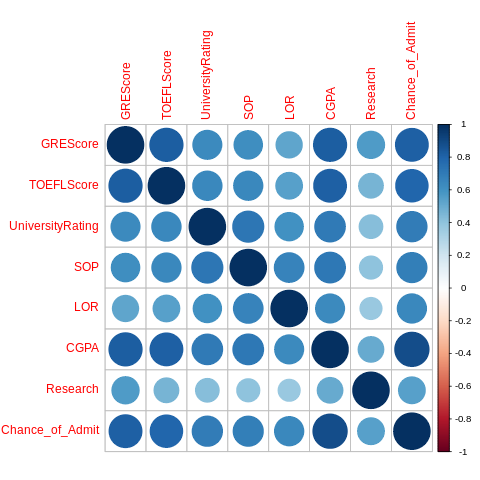

In [ ]:
%%R
library(corrplot)
corrplot(cor(ga1),method="circle")

In [ ]:
%%R
colnames(ga1)
ga1$TOEFLScore

  [1] 118 107 104 110 103 115 109 101 102 108 106 111 112 109 104 105 107 106
 [19] 110 102 107 114 116 119 119 120 109  98  93  99  97 103 118 114 112 110
 [37] 106 105 105 108 110 105 107 117 113 110 114 119 110 111  98 100 116 112
 [55] 110 103 102  99  99 104 100 101 105 107 111 112 114 107 109 115 118 112
 [73] 111 108 106 114 112  99  95  93 105 120 110 115 115 103 106 107 108 109
 [91] 106  97  98  97  99 100 100 120 119 113 107 105 106 104 112 110 111 117
[109] 116 103 108 109 107 110 105 106 102 104  99 104 117 119 106 108 106 100
[127] 113 112 112 118 114 105 105 112 113 109 103 100 116 109 110 118 115 120
[145] 112 113 105 114 116 106 114 116 112 105 108 109 105 104 106 100 103  99
[163] 109 105 111 110 102 102  97  99 101 117 110 113 111 111 119 110 108 102
[181] 104 107 100 110 106 113 107 118 115 112 111 110 114 118 109 107 105 106
[199] 104 107 103 110 120 120 105  99  99 102 106 104 108 110 120 119 117 116
[217] 112 109 110 104 103 110 113 109 105  99 110 110 112 111 10

In [ ]:
%%R
#print(ga1$Chance_of_Admit)
relation<-lm(ga1$Chance_of_Admit~(ga1$GREScore+ga1$TOEFLScore+ga1$CGPA))
print(relation)


Call:
lm(formula = ga1$Chance_of_Admit ~ (ga1$GREScore + ga1$TOEFLScore + 
    ga1$CGPA))

Coefficients:
   (Intercept)    ga1$GREScore  ga1$TOEFLScore        ga1$CGPA  
     -1.596809        0.002352        0.003199        0.143574  



In [ ]:
%%R
summary(relation)



Call:
lm(formula = ga1$Chance_of_Admit ~ (ga1$GREScore + ga1$TOEFLScore + 
    ga1$CGPA))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.293061 -0.020722  0.008274  0.036718  0.141429 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.5968093  0.0909032 -17.566  < 2e-16 ***
ga1$GREScore    0.0023519  0.0005007   4.697 3.42e-06 ***
ga1$TOEFLScore  0.0031986  0.0008953   3.573 0.000388 ***
ga1$CGPA        0.1435741  0.0089717  16.003  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06258 on 496 degrees of freedom
Multiple R-squared:  0.8046,	Adjusted R-squared:  0.8034 
F-statistic: 680.9 on 3 and 496 DF,  p-value: < 2.2e-16



In [ ]:
%%R
print(coefficients(relation))


   (Intercept)   ga1$GREScore ga1$TOEFLScore       ga1$CGPA 
  -1.596809348    0.002351948    0.003198647    0.143574061 


In [ ]:
%%R
c=relation$coefficients[1]
m1=relation$coefficients[2]
m2=relation$coefficients[3]
m3=relation$coefficients[4]
print(c)
print(m1)
print(m2)
print(m3)


(Intercept) 
  -1.596809 
ga1$GREScore 
 0.002351948 
ga1$TOEFLScore 
   0.003198647 
 ga1$CGPA 
0.1435741 


In [ ]:
%%R
ca=c+m1*338+m2*118+m3*9.8
print(ca)

(Intercept) 
  0.9826152 


In [ ]:
%%R
caOut=c+m1*ga1$GREScore+m2*ga1$TOEFLScore+m3*ga1$CGPA
#print(caOut)
ga1<-mutate(ga1,predicted=caOut)
ga2<-mutate(ga1,difference=Chance_of_Admit-predicted)
print(ga2)

# A tibble: 500 × 10
   GREScore TOEFLScore UniversityRating   SOP   LOR  CGPA Research
      <dbl>      <dbl>            <dbl> <dbl> <dbl> <dbl>    <dbl>
 1      337        118                4   4.5   4.5  9.65        1
 2      324        107                4   4     4.5  8.87        1
 3      316        104                3   3     3.5  8           1
 4      322        110                3   3.5   2.5  8.67        1
 5      314        103                2   2     3    8.21        0
 6      330        115                5   4.5   3    9.34        1
 7      321        109                3   3     4    8.2         1
 8      308        101                2   3     4    7.9         0
 9      302        102                1   2     1.5  8           0
10      323        108                3   3.5   3    8.6         0
# … with 490 more rows, and 3 more variables: Chance_of_Admit <dbl>,
#   predicted <dbl>, difference <dbl>


In [ ]:
%%R
colnames(ga2)
ga3=select(ga2,Chance_of_Admit,predicted,difference)
print(tbl_df(ga3),n=100)



# A tibble: 500 × 3
    Chance_of_Admit predicted difference
              <dbl>     <dbl>      <dbl>
  1            0.92     0.959 -0.0387   
  2            0.76     0.781 -0.0210   
  3            0.72     0.628  0.0923   
  4            0.8      0.757  0.0428   
  5            0.65     0.650  0.0000940
  6            0.9      0.888  0.0118   
  7            0.75     0.684  0.0659   
  8            0.68     0.585  0.0951   
  9            0.5      0.588 -0.0883   
 10            0.45     0.743 -0.293    
 11            0.52     0.713 -0.193    
 12            0.84     0.819  0.0205   
 13            0.78     0.839 -0.0594   
 14            0.62     0.622 -0.00248  
 15            0.61     0.645 -0.0346   
 16            0.54     0.669 -0.129    
 17            0.66     0.740 -0.0801   
 18            0.65     0.641  0.00889  
 19            0.63     0.766 -0.136    
 20            0.62     0.662 -0.0425   
 21            0.64     0.613  0.0265   
 22            0.7      0.738 -0.0382

In [ ]:
%%R
#print(ga1$Chance_of_Admit)
relation<-lm(ga1$Chance_of_Admit~(ga1$GREScore+ga1$TOEFLScore+ga1$CGPA+ga1$SOP+ga1$UniversityRating))
print(relation)


Call:
lm(formula = ga1$Chance_of_Admit ~ (ga1$GREScore + ga1$TOEFLScore + 
    ga1$CGPA + ga1$SOP + ga1$UniversityRating))

Coefficients:
         (Intercept)          ga1$GREScore        ga1$TOEFLScore  
           -1.438603              0.002304              0.002603  
            ga1$CGPA               ga1$SOP  ga1$UniversityRating  
            0.127995              0.007779              0.009075  



In [ ]:
%%R
c=relation$coefficients[1]
m1=relation$coefficients[2]
m2=relation$coefficients[3]
m3=relation$coefficients[4]
m4=relation$coefficients[5]
m5=relation$coefficients[6]
print(c)
print(m1)
print(m2)
print(m3)
print(m4)
print(m5)


(Intercept) 
  -1.438603 
ga1$GREScore 
   0.0023038 
ga1$TOEFLScore 
   0.002602854 
 ga1$CGPA 
0.1279954 
    ga1$SOP 
0.007778737 
ga1$UniversityRating 
         0.009074942 


In [ ]:
%%R
ca=c+m1*338+m2*118+m3*9.8+m4*5+m5*5
print(ca)

(Intercept) 
  0.9858415 


In [ ]:
%%R
caOut=c+m1*ga1$GREScore+m2*ga1$TOEFLScore+m3*ga1$CGPA+m4*ga1$SOP+m5*ga1$UniversityRating
#print(caOut)
ga2<-mutate(ga2,predicted=caOut)
ga3<-mutate(ga2,difference=Chance_of_Admit-predicted)
print(ga3)

# A tibble: 500 × 10
   GREScore TOEFLScore UniversityRating   SOP   LOR  CGPA Research
      <dbl>      <dbl>            <dbl> <dbl> <dbl> <dbl>    <dbl>
 1      337        118                4   4.5   4.5  9.65        1
 2      324        107                4   4     4.5  8.87        1
 3      316        104                3   3     3.5  8           1
 4      322        110                3   3.5   2.5  8.67        1
 5      314        103                2   2     3    8.21        0
 6      330        115                5   4.5   3    9.34        1
 7      321        109                3   3     4    8.2         1
 8      308        101                2   3     4    7.9         0
 9      302        102                1   2     1.5  8           0
10      323        108                3   3.5   3    8.6         0
# … with 490 more rows, and 3 more variables: Chance_of_Admit <dbl>,
#   predicted <dbl>, difference <dbl>


In [ ]:
%%R
colnames(ga2)
ga3=select(ga2,Chance_of_Admit,predicted,difference,SOP,UniversityRating)
print(tbl_df(ga3),n=100)

# A tibble: 500 × 5
    Chance_of_Admit predicted difference   SOP UniversityRating
              <dbl>     <dbl>      <dbl> <dbl>            <dbl>
  1            0.92     0.951 -0.0387      4.5                4
  2            0.76     0.789 -0.0210      4                  4
  3            0.72     0.635  0.0923      3                  3
  4            0.8      0.754  0.0428      3.5                3
  5            0.65     0.637  0.0000940   2                  2
  6            0.9      0.897  0.0118      4.5                5
  7            0.75     0.685  0.0659      3                  3
  8            0.68     0.587  0.0951      3                  2
  9            0.5      0.571 -0.0883      2                  1
 10            0.45     0.742 -0.293       3.5                3
 11            0.52     0.716 -0.193       3.5                3
 12            0.84     0.823  0.0205      4                  4
 13            0.78     0.841 -0.0594      4                  4
 14            0.62 